In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import json

In [33]:
# get JRA55-do forcing fields from forcing.json
runs = ['input4MIPs_testing_1deg_jra55_iaf_control', 'input4MIPs_testing_1deg_jra55_iaf_test_yearp1_qv56']  # runs to compare
forcing = []
for r in runs:
    fpath = '/g/data/hh5/tmp/cosima/access-om2/'+r+'/output000/atmosphere/forcing.json'
    with open(fpath) as json_file:
        forcing.append(json.load(json_file))

rsds = rsds? True
rlds = rlds? True
prrn = prra? True
prsn = prsn? True
psl = psl? True
friver = friver? True
tas_10m = tas? False
/g/data1/ua8/JRA55-do/latest/t_10.1958.nc
<xarray.DataArray 'tas_10m' (latitude: 320, longitude: 640)>
array([[253.22519, 253.22519, 253.22519, ..., 253.22519, 253.22519, 253.22519],
       [253.60388, 253.60388, 253.60388, ..., 253.60388, 253.60388, 253.60388],
       [253.98482, 253.98482, 253.98482, ..., 253.98482, 253.98482, 253.98482],
       ...,
       [238.34068, 238.38274, 238.42615, ..., 238.2284 , 238.26494, 238.3015 ],
       [239.43384, 239.48071, 239.5281 , ..., 239.31105, 239.34796, 239.37918],
       [240.63419, 240.58076, 240.60344, ..., 240.47102, 240.49231, 240.51193]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -89.57 -89.01 -88.45 ... 88.45 89.01 89.57
  * longitude  (longitude) float64 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
    time       datetime64[ns] 1958-12-31T21:00:00
Attributes:
    units:          

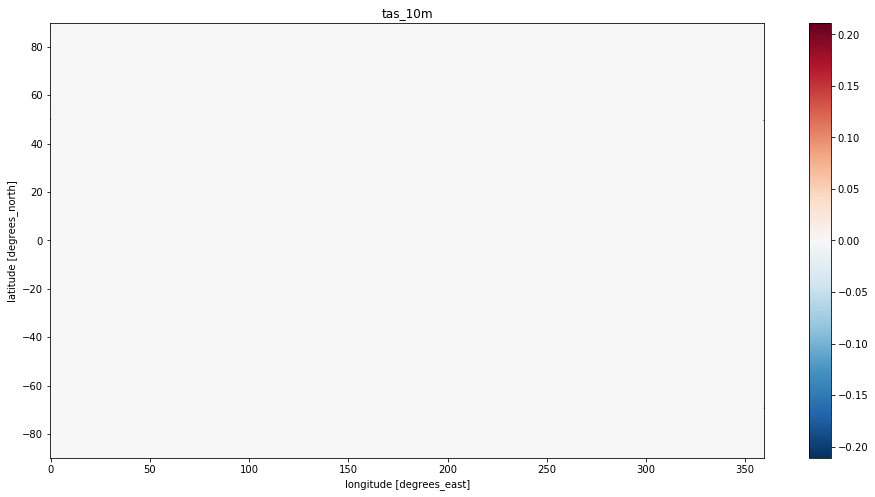

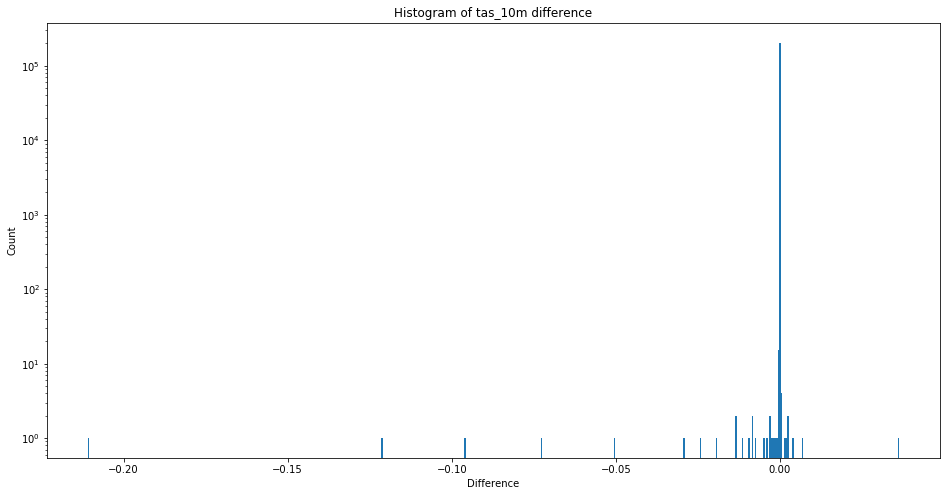

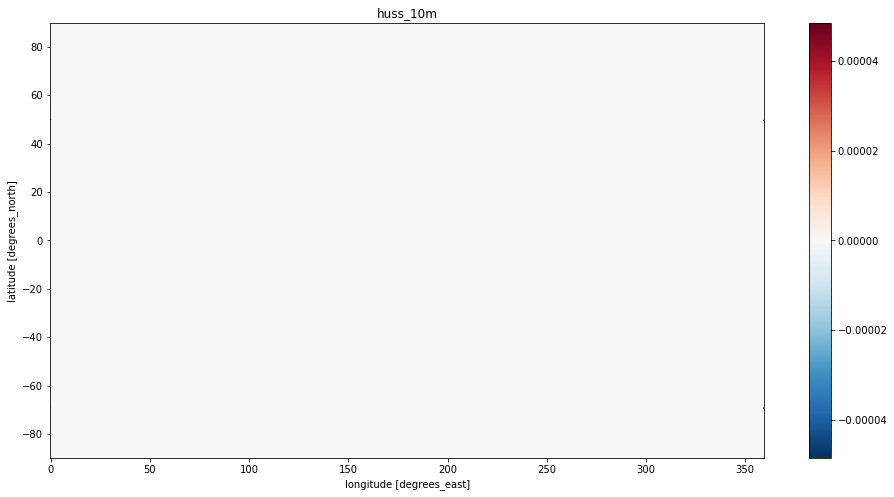

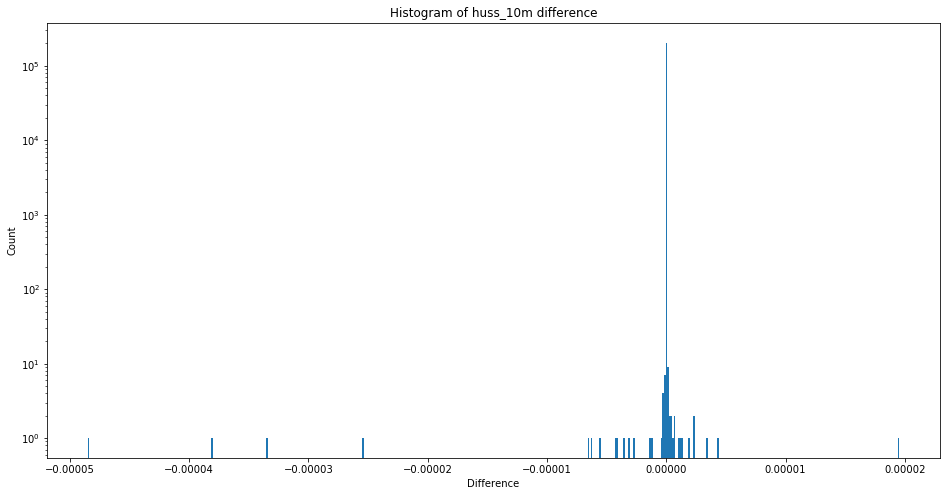

In [100]:
# compare corresponding fields (assuming they are in the same order in the two forcing.json files)
fields = list(zip(forcing[0]['inputs'],forcing[1]['inputs']))
for field in fields:
    for year in range(1958,1959):
        fn0 = field[0]['filename'].replace('{{year}}',str(year)).replace('{{year+1}}',str(year+1))
        fn1 = field[1]['filename'].replace('{{year}}',str(year)).replace('{{year+1}}',str(year+1))
        da0 = xr.open_dataset(fn0)[field[0]['fieldname']].isel(time=-1)
        da1 = xr.open_dataset(fn1)[field[1]['fieldname']].isel(time=-1).rename({'lon': 'longitude','lat': 'latitude'})
        try:
            da1 = da1.drop('height')
        except:
            pass
        ok = da0.equals(da1)
        print(field[0]['fieldname']+' = '+field[1]['fieldname']+'? '+str(ok))
        if not ok:
            print(fn0)
            print(da0)
            print(fn1)
            print(da1)
            diff = da1-da0
            plt.figure(figsize=(16,8))
            diff.plot()
            plt.title(field[0]['fieldname']+' difference')
            plt.figure(figsize=(16,8))
            plt.hist(np.ma.ravel(diff), bins=500, log=True);
            plt.xlabel('Difference')
            plt.ylabel('Count');
            plt.title('Histogram of '+field[0]['fieldname']+' difference');